In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
data = pd.read_csv(r'/content/credit_data.csv',delimiter=',')
print(data.isna().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [ ]:
target = data['Risk']
data = data.drop(['Risk','Unnamed: 0', 'Purpose'], axis=1)

In [ ]:
data['Saving accounts'] = data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
data['Checking account'] = data['Checking account'].map({"little":1,"moderate":2,"rich":3 });
target = target.map({"good":1,"bad":0});
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)

In [ ]:
new_data = pd.get_dummies(data)
new_data.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,67,2,0.0,1.0,1169,6,0,1,0,1,0
1,22,2,1.0,2.0,5951,48,1,0,0,1,0
2,49,1,1.0,0.0,2096,12,0,1,0,1,0
3,45,2,1.0,1.0,7882,42,0,1,1,0,0
4,53,2,1.0,1.0,4870,24,0,1,1,0,0


In [ ]:
y = new_data['Housing_rent']
X = new_data.drop(columns=['Housing_rent'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred1 = model.predict(x_test)
y_pred1

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred1)) 
print(classification_report(y_test,y_pred1))

[[157   0]
 [  0  43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        43

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
y_pred1 = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.15, 0.85],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.18, 0.82],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.97, 0.03],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.08, 0.92],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.86, 0.14],
       [0.17, 0.83],
       [0.13, 0.87],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.07, 0.93],
       [0.02, 0.98],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.94, 0.06],
       [0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.96,

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
probs = y_pred_proba[:, 1]
fpr1, tpr1, treshold = roc_curve(y_test, probs)

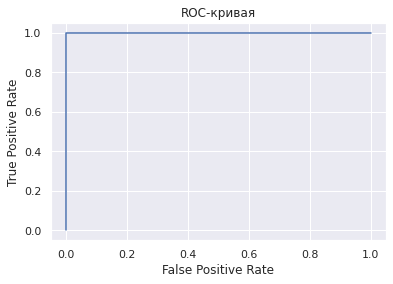

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [ ]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;
from sklearn.preprocessing import normalize;
y = KMeans().fit_predict(new_data)
X = normalize(new_data);
x_PCA = PCA(n_components=2).fit_transform(X,2);
print(x_PCA.shape)

(1000, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred1 = model.predict(x_test)
y_pred1

array([5, 7, 7, 0, 6, 0, 5, 0, 5, 3, 6, 0, 3, 0, 0, 5, 1, 5, 3, 3, 3, 7,
       0, 0, 0, 1, 5, 3, 5, 5, 0, 1, 6, 1, 5, 3, 4, 0, 0, 5, 5, 7, 1, 5,
       0, 3, 5, 5, 0, 1, 0, 6, 3, 3, 1, 3, 3, 6, 5, 0, 5, 5, 0, 4, 0, 3,
       0, 3, 3, 5, 0, 0, 0, 0, 3, 6, 5, 6, 5, 5, 0, 5, 3, 3, 5, 0, 7, 0,
       0, 5, 5, 0, 5, 3, 5, 2, 3, 1, 2, 0, 5, 0, 6, 5, 1, 7, 0, 6, 0, 7,
       0, 3, 0, 1, 5, 5, 5, 0, 5, 0, 0, 5, 3, 0, 4, 6, 0, 7, 3, 1, 0, 0,
       5, 3, 3, 0, 3, 3, 1, 0, 5, 0, 6, 6, 5, 7, 0, 3, 1, 0, 0, 0, 0, 0,
       5, 0, 6, 0, 0, 6, 5, 5, 0, 5, 1, 1, 6, 1, 5, 5, 0, 2, 0, 3, 5, 0,
       5, 5, 0, 5, 6, 0, 6, 6, 1, 7, 0, 6, 3, 0, 5, 1, 5, 2, 0, 0, 3, 5,
       0, 3], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred1)) 
print(classification_report(y_test,y_pred1))

[[64  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0  3  0  0  1]
 [ 0  0  0  0  0 50  0  0]
 [ 0  2  0  1  0  0 19  1]
 [ 0  0  0  0  0  0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.89      1.00      0.94        16
           2       1.00      1.00      1.00         4
           3       0.97      1.00      0.98        31
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00        50
           6       1.00      0.83      0.90        23
           7       0.80      1.00      0.89         8

    accuracy                           0.97       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.98      0.97      0.97       200



<Figure size 432x288 with 0 Axes>

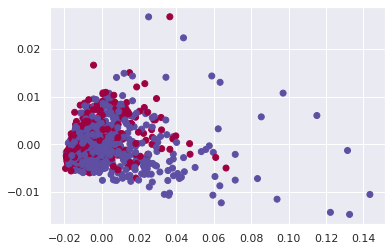

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(x_PCA[:,0], x_PCA[:,1], c=target, cmap='Spectral')
plt.figure()